<h1>contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pprint
import functools
import tqdm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim

import optuna

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from IPython.display import display

%matplotlib inline

In [2]:
class MultiLayerPerceptronRegressor(nn.Module):
    """
    feedforward neural network regressor
    """
    def __init__(self, layers:list, activation:torch.nn.modules.activation):
        super(MultiLayerPerceptronRegressor, self).__init__()
        _architecture = list()

        for index, layer in enumerate(layers[:-2]):
            _architecture.append(nn.Linear(layer, layers[index+1]))
            _architecture.append(activation())
        _architecture.append(nn.Linear(layers[-2], layers[-1]))
        
        self.architecture = nn.Sequential(*_architecture)

    def forward(self, x):
        return self.architecture(x)

torch.manual_seed(33) ;


$$ \ddot{x} + \frac{\mu}{m} \dot{x} + \frac{k}{m} x = 0 $$

,time,position
0,0.000000,1.000000
1,0.505050,0.968549
2,1.010101,0.877217
3,1.515152,0.733215
4,2.020202,0.546879


<Axes: title={'center': 'Damped Harmonic Oscillator'}, xlabel='time'>

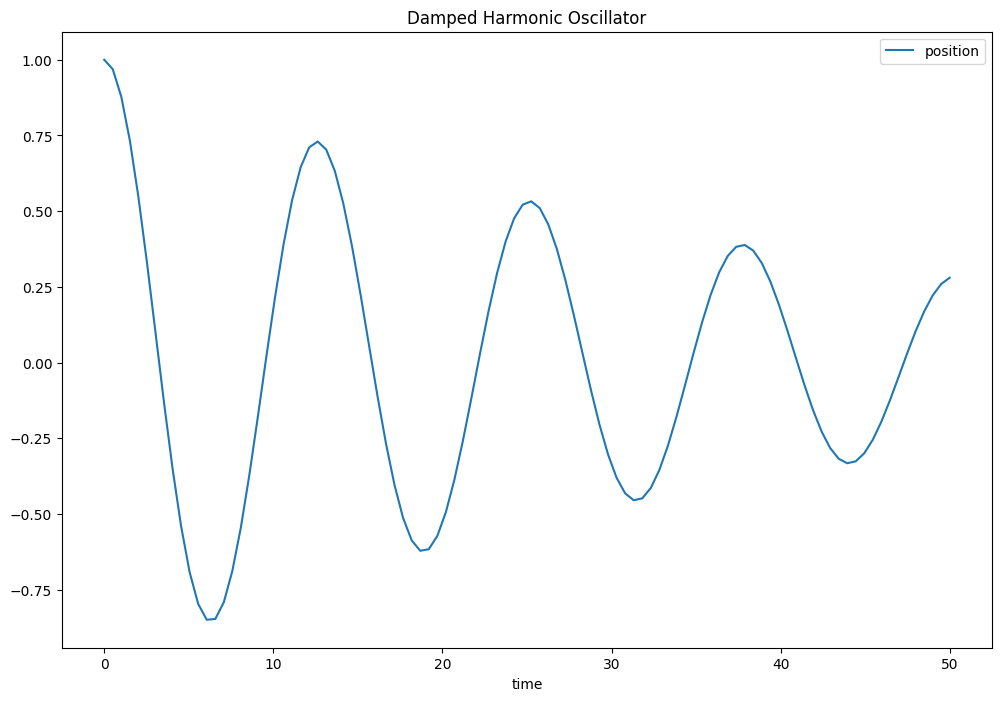

In [16]:
X = pd.read_csv("../data/01_raw/damped-harmonic-oscillator/extrapolation/train.csv").query("time <= 50")

# min_max_scaler = MinMaxScaler()
# X["time"] = min_max_scaler.fit_transform(X["time"].values.reshape(-1, 1))

def oscillator(d, w0, x):
    """Defines the analytical solution to the 1D underdamped harmonic oscillator problem. 
    Equations taken from: https://beltoforion.de/en/harmonic_oscillator/"""
    assert d < w0
    w = np.sqrt(w0**2-d**2)
    phi = np.arctan(-d/w)
    A = 1/(2*np.cos(phi))
    cos = torch.cos(phi+w*x)
    sin = torch.sin(phi+w*x)
    exp = torch.exp(-d*x)
    y  = exp*2*A*cos
    return y


d, w0 = 0.025, 0.5
x = torch.linspace(0, 50, 100).view(-1,1)
y = oscillator(d, w0, x).view(-1,1)

X = pd.DataFrame({"time": x.squeeze(), "position": y.squeeze()})

display(X.head())

X.plot(x="time", y="position", figsize=(12, 8), title="Damped Harmonic Oscillator")

MultiLayerPerceptronRegressor(
  (architecture): Sequential(
    (0): Linear(in_features=1, out_features=64, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=64, out_features=1, bias=True)
  )
)


  3%|█▎                                   | 1030/30000 [00:04<01:59, 242.39it/s]

Data Loss: 0.679419, Physics Loss: 0.065146, x0 Loss: 0.000183, v0 Loss: 0.036992, Total Loss: 0.685972


  7%|██▌                                  | 2039/30000 [00:08<01:46, 262.66it/s]

Data Loss: 0.729680, Physics Loss: 0.057919, x0 Loss: 0.000013, v0 Loss: 0.270901, Total Loss: 0.735743


 10%|███▊                                 | 3041/30000 [00:13<02:00, 223.17it/s]

Data Loss: 0.544543, Physics Loss: 0.063045, x0 Loss: 0.000042, v0 Loss: 0.326101, Total Loss: 0.551174


 13%|████▉                                | 4030/30000 [00:17<01:54, 227.57it/s]

Data Loss: 0.423618, Physics Loss: 0.082592, x0 Loss: 0.002855, v0 Loss: 0.173911, Total Loss: 0.432080


 17%|██████▏                              | 5037/30000 [00:21<01:48, 229.23it/s]

Data Loss: 0.298470, Physics Loss: 0.080047, x0 Loss: 0.000338, v0 Loss: 0.378632, Total Loss: 0.306857


 20%|███████▍                             | 6034/30000 [00:26<01:43, 231.29it/s]

Data Loss: 0.258232, Physics Loss: 0.066639, x0 Loss: 0.000615, v0 Loss: 0.388478, Total Loss: 0.265291


 24%|████████▋                            | 7071/30000 [00:29<01:09, 332.18it/s]

Data Loss: 0.174784, Physics Loss: 0.225871, x0 Loss: 0.000130, v0 Loss: 0.374412, Total Loss: 0.197747


 27%|█████████▉                           | 8030/30000 [00:33<01:37, 225.13it/s]

Data Loss: 0.091900, Physics Loss: 0.268849, x0 Loss: 0.000011, v0 Loss: 0.367442, Total Loss: 0.119152


 30%|███████████▏                         | 9050/30000 [00:37<01:24, 246.71it/s]

Data Loss: 0.188729, Physics Loss: 0.118410, x0 Loss: 0.000016, v0 Loss: 0.375167, Total Loss: 0.200945


 33%|████████████                        | 10032/30000 [00:41<01:20, 247.22it/s]

Data Loss: 0.122578, Physics Loss: 0.225076, x0 Loss: 0.000099, v0 Loss: 0.408280, Total Loss: 0.145494


 37%|█████████████▎                      | 11053/30000 [00:45<00:52, 360.33it/s]

Data Loss: 0.006509, Physics Loss: 0.071643, x0 Loss: 0.000028, v0 Loss: 0.427363, Total Loss: 0.014101


 40%|██████████████▍                     | 12030/30000 [00:49<01:20, 221.88it/s]

Data Loss: 0.002570, Physics Loss: 0.068290, x0 Loss: 0.000261, v0 Loss: 0.449197, Total Loss: 0.009851


 43%|███████████████▋                    | 13024/30000 [00:53<01:14, 228.72it/s]

Data Loss: 0.114315, Physics Loss: 0.112208, x0 Loss: 0.000020, v0 Loss: 0.343800, Total Loss: 0.125879


 47%|████████████████▊                   | 14046/30000 [00:58<01:07, 234.86it/s]

Data Loss: 0.035822, Physics Loss: 0.081709, x0 Loss: 0.000073, v0 Loss: 0.401248, Total Loss: 0.044395


 50%|██████████████████                  | 15031/30000 [01:02<01:05, 229.53it/s]

Data Loss: 0.015458, Physics Loss: 0.073206, x0 Loss: 0.001658, v0 Loss: 0.427841, Total Loss: 0.023223


 53%|███████████████████▎                | 16044/30000 [01:06<00:55, 251.53it/s]

Data Loss: 0.000215, Physics Loss: 0.073809, x0 Loss: 0.000000, v0 Loss: 0.187947, Total Loss: 0.007783


 57%|████████████████████▍               | 17029/30000 [01:11<00:57, 225.58it/s]

Data Loss: 0.038948, Physics Loss: 0.073910, x0 Loss: 0.000116, v0 Loss: 0.191008, Total Loss: 0.046531


 60%|█████████████████████▋              | 18027/30000 [01:15<00:51, 233.76it/s]

Data Loss: 0.003093, Physics Loss: 0.078719, x0 Loss: 0.000005, v0 Loss: 0.313628, Total Loss: 0.011278


 64%|██████████████████████▉             | 19068/30000 [01:18<00:29, 365.51it/s]

Data Loss: 0.000817, Physics Loss: 0.074176, x0 Loss: 0.000020, v0 Loss: 0.286215, Total Loss: 0.008521


 67%|████████████████████████            | 20030/30000 [01:21<00:38, 258.07it/s]

Data Loss: 0.000347, Physics Loss: 0.076294, x0 Loss: 0.000001, v0 Loss: 0.436399, Total Loss: 0.008413


 70%|█████████████████████████▎          | 21042/30000 [01:25<00:30, 291.55it/s]

Data Loss: 0.000706, Physics Loss: 0.073137, x0 Loss: 0.000038, v0 Loss: 0.433037, Total Loss: 0.008454


 73%|██████████████████████████▍         | 22040/30000 [01:29<00:27, 292.61it/s]

Data Loss: 0.000690, Physics Loss: 0.077861, x0 Loss: 0.000030, v0 Loss: 0.439135, Total Loss: 0.008915


 77%|███████████████████████████▋        | 23046/30000 [01:32<00:22, 308.65it/s]

Data Loss: 0.000097, Physics Loss: 0.074166, x0 Loss: 0.000005, v0 Loss: 0.189690, Total Loss: 0.007703


 80%|████████████████████████████▊       | 24035/30000 [01:36<00:26, 221.07it/s]

Data Loss: 0.050416, Physics Loss: 0.094663, x0 Loss: 0.002473, v0 Loss: 0.256632, Total Loss: 0.060164


 83%|██████████████████████████████      | 25045/30000 [01:40<00:21, 230.64it/s]

Data Loss: 0.000138, Physics Loss: 0.068773, x0 Loss: 0.000001, v0 Loss: 0.635714, Total Loss: 0.007651


 87%|███████████████████████████████▏    | 26034/30000 [01:44<00:14, 270.87it/s]

Data Loss: 0.006702, Physics Loss: 0.088375, x0 Loss: 0.000255, v0 Loss: 0.175323, Total Loss: 0.015717


 90%|████████████████████████████████▍   | 27041/30000 [01:47<00:08, 360.78it/s]

Data Loss: 0.000273, Physics Loss: 0.071957, x0 Loss: 0.000006, v0 Loss: 0.205407, Total Loss: 0.007674


 93%|█████████████████████████████████▋  | 28031/30000 [01:51<00:08, 230.03it/s]

Data Loss: 0.000437, Physics Loss: 0.072913, x0 Loss: 0.000000, v0 Loss: 0.232833, Total Loss: 0.007961


 97%|██████████████████████████████████▉ | 29072/30000 [01:55<00:02, 382.05it/s]

Data Loss: 0.000048, Physics Loss: 0.072000, x0 Loss: 0.000001, v0 Loss: 0.481694, Total Loss: 0.007729


100%|████████████████████████████████████| 30000/30000 [01:58<00:00, 252.49it/s]


Data Loss: 0.000020, Physics Loss: 0.063849, x0 Loss: 0.000005, v0 Loss: 0.513212, Total Loss: 0.006918


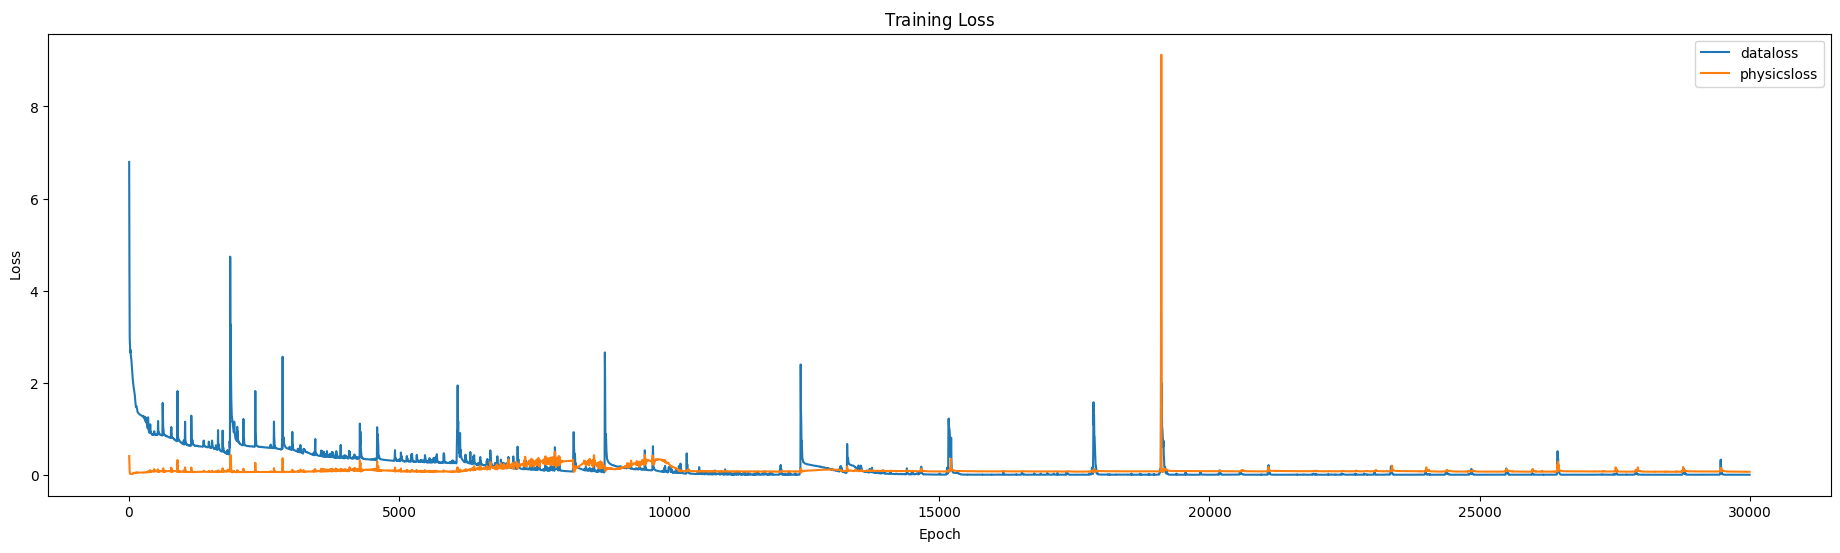

In [52]:
m = 1
# k = 1
# mu = 0.1
mu, k = 2*d, w0**2
x_0 = 1
v_0 = 0

torch.manual_seed(33)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

x_train = torch.tensor(X.query("time <= 30")["time"].values).float().unsqueeze(1).to(device)
y_train = torch.tensor(X.query("time <= 30")["displacement"].values).float().unsqueeze(1).to(device)

x_test = torch.tensor(X.query("time > 30")["time"].values).float().unsqueeze(1).to(device)
y_test = torch.tensor(X.query("time > 30")["displacement"].values).float().unsqueeze(1).to(device)

hparam_dict = {
    'learning_rate': 5e-3,
    'n_layers': 3,
    'n_neurons': 64,
    'num_epochs': 30000,
 }

learning_rate = hparam_dict["learning_rate"]
num_epochs = hparam_dict["num_epochs"]
architecture = [1] + [hparam_dict["n_neurons"] for _ in range(hparam_dict["n_layers"])] + [1]

model = MultiLayerPerceptronRegressor(architecture, nn.LeakyReLU)
model.to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

print(model)

plot_loss_train = dict(epoch=[], dataloss=[], physicsloss=[])

_locations = torch.linspace(0, 50, 30).view(-1,1).requires_grad_(True).to(device)
_m = torch.tensor(m, dtype=torch.float, requires_grad=False).to(device)
_mu = torch.tensor(mu, dtype=torch.float, requires_grad=False).to(device)
_k = torch.tensor(k, dtype=torch.float, requires_grad=False).to(device)
_x0 = torch.tensor(x_0, dtype=torch.float, requires_grad=False).to(device)
_v0 = torch.tensor(v_0, dtype=torch.float, requires_grad=False).to(device)

for epoch in tqdm.tqdm(range(hparam_dict["num_epochs"])):
    optimizer.zero_grad()

    # forward
    y_train_hat = model(x_train)
    data_loss = torch.sum((y_train_hat - y_train)**2)

    y_location_hat = model(_locations)
    dydt = torch.autograd.grad(y_location_hat, _locations, grad_outputs=torch.ones_like(y_location_hat), create_graph=True)[0]
    dy2dt2 = torch.autograd.grad(dydt, _locations, grad_outputs=torch.ones_like(dydt), create_graph=True)[0]

    _x0_loss = torch.mean((y_location_hat[0] - _x0)**2)
    _v0_loss = torch.mean((dydt[0] - _v0)**2)

    _diff_equation = _m*dy2dt2 + _mu*dydt + _k*y_location_hat
    
    physics_loss = torch.mean(_diff_equation**2)

    loss = data_loss + (1e-1)*(physics_loss) #+ (1e-2)*(_x0_loss) + (1e-3)*(_v0_loss)
    
    # backward
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 1000 == 0:
        str_epoch = str(epoch+1).zfill(5)
        str_num_epochs = str(num_epochs).zfill(5)
        str_loss = str(round(loss.item(), 4))
        str_physics_loss = str(round(physics_loss.item(), 4))
        # print(f"epoch [{str_epoch}/{str_num_epochs}] loss: {str_loss} physics loss: {str_physics_loss}")
        print(f"Data Loss: {data_loss.item():.6f}, Physics Loss: {physics_loss.item():.6f}, x0 Loss: {_x0_loss.item():.6f}, v0 Loss: {_v0_loss.item():.6f}, Total Loss: {loss.item():.6f}")

    if (epoch+1) % 5 == 0:
        plot_loss_train["epoch"].append(epoch+1)
        plot_loss_train["dataloss"].append(data_loss.item())
        plot_loss_train["physicsloss"].append(physics_loss.item())

fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(23, 6))

pd.DataFrame(plot_loss_train).plot(x="epoch", y="dataloss", figsize=(23, 6), ax=ax1)
pd.DataFrame(plot_loss_train).plot(x="epoch", y="physicsloss", figsize=(23, 6), ax=ax1)
ax1.set_xlabel(r"$\mathrm{Epoch}$")
ax1.set_ylabel(r"$\mathrm{Loss}$")
ax1.set_title(r"$\mathrm{Training}$ $\mathrm{Loss}$")

plt.savefig("../data/08_reporting/figures/oscilador_harmonico_loss_pinn.png", dpi=300, bbox_inches="tight") ;

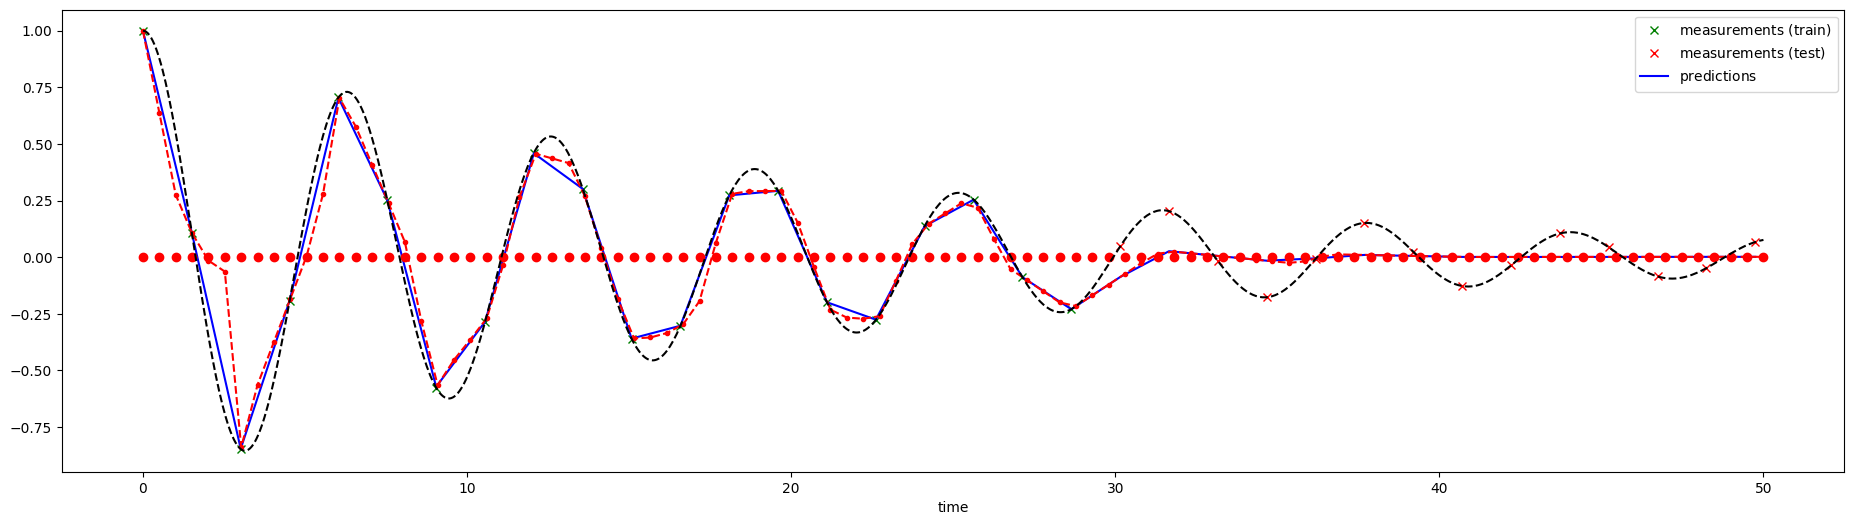

In [57]:
model.eval()

with torch.no_grad():
    X["y_hat"] = model(torch.tensor(X["time"].values).float().unsqueeze(1).to(device)).cpu().detach().numpy()

fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(23, 6))

X.query("time <= 30").plot(
    x="time", 
    y="displacement", 
    ax=ax1,
    marker="x", c="g", linestyle="none", 
    label=r"$\text{measurements (train)}$"
)

X.query("time > 30").plot(
    x="time", 
    y="displacement", 
    ax=ax1,
    marker="x", c="r", linestyle="none", 
    label=r"$\text{measurements (test)}$"
)

X.plot(
    x="time", 
    y="y_hat", 
    ax=ax1,
    c="b", linestyle="-", 
    label=r"$\text{predictions}$"
)

ax1.plot(
    _locations.cpu().detach().numpy().reshape(-1, 1),
    model(_locations).cpu().detach().numpy().reshape(-1)*0, 
    c="r", linestyle="none", marker="o",
    label=r"$\text{locations}$"
)

ax1.plot(
    _locations.cpu().detach().numpy().reshape(-1, 1),
    model(_locations).cpu().detach().numpy().reshape(-1), 
    c="r", linestyle="--", marker=".",
    label=r"$\text{locations prediction}$"
)

# plot theoretical curve
m = 1
k = 1
mu = 0.1
x_0 = 1
v_0 = 0

omega_0 = np.sqrt(k/m)
delta = mu/(2*m)
omega = np.sqrt(omega_0**2 - delta**2)

t = np.linspace(0, 50, 1000)
x = np.exp(-delta*t)*(x_0*np.cos(omega*t) + (v_0 + delta*x_0)/omega*np.sin(omega*t))
ax1.plot(
    t.reshape(-1, 1),
    x, 
    c="k", linestyle="--", 
    label=r"$\text{exact solution}$"
)

# ax1.set_xlabel(r"$\mathrm{time}$ $\mathrm{(s)}$")
# ax1.set_ylabel(r"$\mathrm{displacement}$ $\mathrm{(m)}$")
# ax1.set_title(r"$\mathrm{Damped}$ $\mathrm{Harmonic}$ $\mathrm{Oscillator}$")

# plt.suptitle(f"MSE = {round(mean_squared_error(X['displacement'], X['y_hat']), 4)}")
# ax1.legend()

# plt.savefig("../data/08_reporting/figures/oscilador_harmonico_predictions_pinn.png", dpi=300, bbox_inches="tight") ;

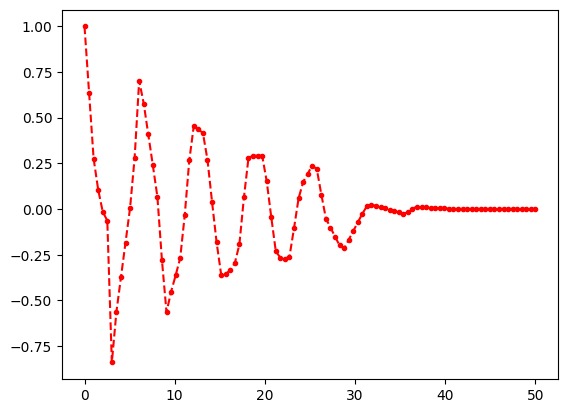

In [58]:
model.eval()
with torch.no_grad():
    plt.plot(
        _locations.cpu().detach().numpy().reshape(-1, 1),
        model(_locations).cpu().detach().numpy().reshape(-1), 
        c="r", linestyle="--", marker=".",
        label=r"$\text{locations prediction}$"
    )

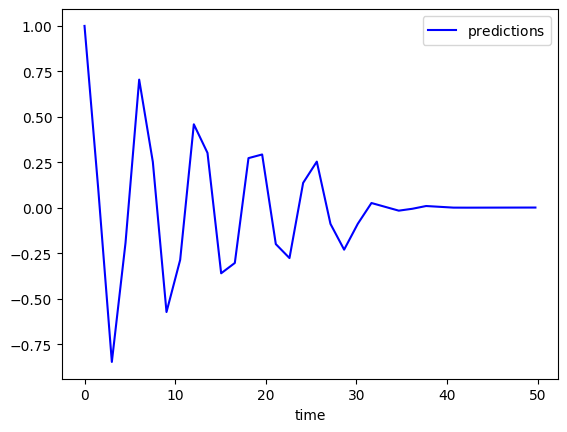

In [59]:
X.plot(
    x="time", 
    y="y_hat",
    c="b", linestyle="-", 
    label=r"$\text{predictions}$"
) ;

In [56]:
X

,time,displacement,velocity,acceleration,y_hat
0,0.000000,1.000000,0.000000,-1.000000,0.998888
1,1.507538,0.106701,-0.926586,-0.014042,0.107533
2,3.015075,-0.847175,-0.111879,0.858363,-0.845938
3,4.522613,-0.194060,0.783410,0.115719,-0.192361
4,6.030151,0.705190,0.190814,-0.724272,0.704014
5,7.537689,0.252050,-0.650740,-0.186976,0.252197
6,9.045226,-0.576071,-0.242684,0.600339,-0.572037
7,10.552764,-0.286335,0.530372,0.233298,-0.285619
8,12.060302,0.460883,0.272761,-0.488160,0.458716
9,13.567840,0.301914,-0.423218,-0.259593,0.301680


.